<h1> Feature Selection </h1>

In machine learning, it is desirable to input in a model feature variables (or explanatory variables, as statisticians may prefer) that are as highly correlated as possible to the target variable (or resposne variable), but highly uncorrelated among themselves. Frequently, one may need to change the input feature space so as to reduce overfitting (thus improving the generalization of models) and to gain a better understanding of the features and their relationship to the target variable. 

For that matter, a few main feature engineering techniques can be applied: 

- **Feature Transformation**: to transform your input data without reducing the number of features (you can transform your data to an orthogonal space, for example)
- **Feature Extraction**: reducing the number of features by transforming your input space into a reduced space, but modifying your original features
- **Feature Selection**: reducing the number of features in your input data by selecting only the most important features, but not transforming the selected input features.

In this notebook, we will cover a few Feature Selection techniques.


<h2> Imports </h2>

In [27]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2> Loading the Dataset </h2> 

We will work on the classical sklearn Breast Cancer dataset, which contains 30 numerical features and a binary target variable, as depicted below.

In [ ]:
data = load_breast_cancer()
df_target = pd.DataFrame(data.target, columns = ['target'])
df_features = pd.DataFrame(data.data, columns=data.feature_names)

In [18]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

_________________________________
<h2>1. Univatiate Selection </h2>

Univariate feature selection examines each feature **individually** to determine the strength of the relationship of the feature with the target variable. It can be seen as a preprocessing step to an estimator. 

These methods are simple to run and understand and are in general particularly good for gaining a better understanding of data (but not necessarily for optimizing the feature set for better generalization). There are lot of different options for univariate selection.

Scikit-learn exposes feature selection routines as objects that implement the transform method, such as:
- **SelectKBest**: removes all but the k highest scoring features
- **SelectPercentile**: removes all but a user-specified highest scoring percentage of features
- **GenericUnivariateSelect**:  allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile). Here are a few scoring functions:

- For regression: f_regression, mutual_info_regression
- For classification: chi2, f_classif, mutual_info_classif

In [89]:
from sklearn.feature_selection import SelectKBest

<h3> Chi2 </h3>
The chi-squared stat shows the relationship between each non-negative feature and the target class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, **which must contain only non-negative features** such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [90]:
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(score_func = chi2, # Callable function 
                   k=10) # Number of features to use after transform 
chi2_selector.fit(df_features, df_target)

SelectKBest(k=10, score_func=<function chi2 at 0x000002C3436D99D8>)

Text(0,0.5,'Features')

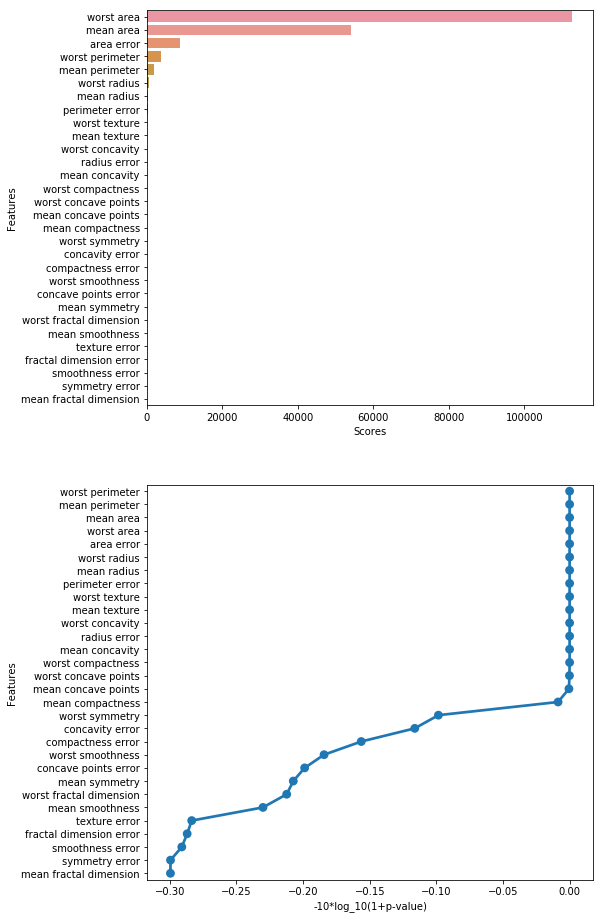

In [91]:
sorted_features_ix = np.argsort(-chi2_selector.scores_)
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(8, 16))
sns.barplot(ax = ax1, y = df_features.columns[sorted_features_ix], x = chi2_selector.scores_[sorted_features_ix], orient = "h")
ax1.set_xlabel('Scores')
ax1.set_ylabel('Features')

sorted_features_ix = np.argsort(chi2_selector.pvalues_)
sns.pointplot(ax = ax2, y = df_features.columns[sorted_features_ix], x = -np.log10(1+chi2_selector.pvalues_[sorted_features_ix]), orient = "h")
ax2.set_xlabel('-10*log_10(1+p-value)')
ax2.set_ylabel('Features')

<h3> F_Classif</h3>
If the features are categorical, calculate a chi2 statistic between each feature and the target vector. However, if the features are quantitative, compute the ANOVA (Analysis of Variance) F-value between each feature and the target vector.

The F-value score examines if, when we group the numerical feature by the target vector, the means for each group are significantly different.

In [98]:
from sklearn.feature_selection import f_classif
fclassif_selector = SelectKBest(score_func = f_classif, # Callable function 
                   k=10) # Number of features to use after transform 
fclassif_selector.fit(df_features, np.ravel(df_target))

SelectKBest(k=10, score_func=<function f_classif at 0x000002C3436D90D0>)

Text(0,0.5,'Features')

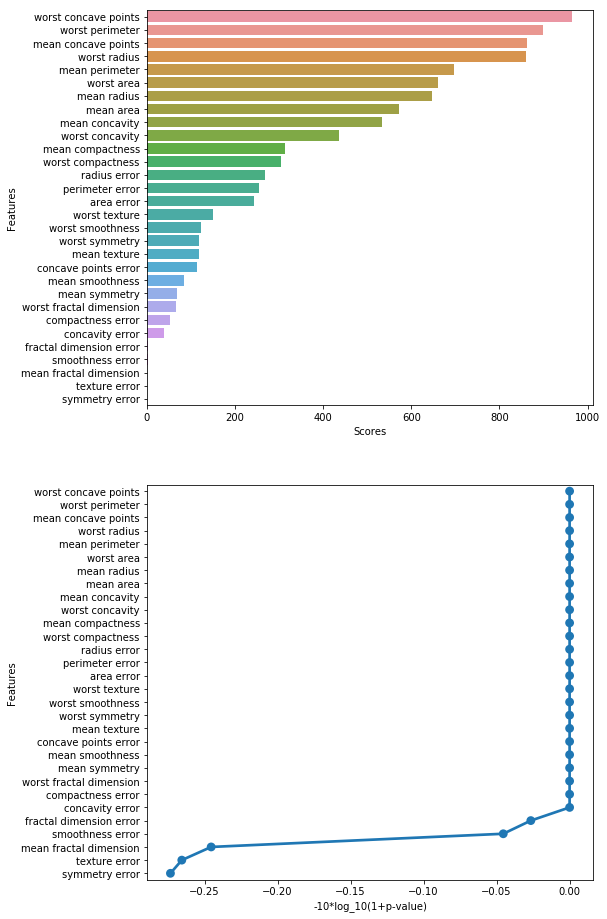

In [99]:
sorted_features_ix = np.argsort(-fclassif_selector.scores_)
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(8, 16))
sns.barplot(ax = ax1, y = df_features.columns[sorted_features_ix], x = fclassif_selector.scores_[sorted_features_ix], orient = "h")
ax1.set_xlabel('Scores')
ax1.set_ylabel('Features')

sorted_features_ix = np.argsort(fclassif_selector.pvalues_)
sns.pointplot(ax = ax2, y = df_features.columns[sorted_features_ix], x = -np.log10(1+fclassif_selector.pvalues_[sorted_features_ix]), orient = "h")
ax2.set_xlabel('-10*log_10(1+p-value)')
ax2.set_ylabel('Features')

<h3> Mutual Info Classif</h3>

In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (in units such as shannons, more commonly called bits) obtained about one random variable, through the other random variable.

In [95]:
from sklearn.feature_selection import mutual_info_classif    
mi_selector = SelectKBest(score_func = f_classif, # Callable function 
                   k=10) # Number of features to use after transform 
mi_selector.fit(df_features, np.ravel(df_target))

SelectKBest(k=10, score_func=<function f_classif at 0x000002C3436D90D0>)

Text(0,0.5,'Features')

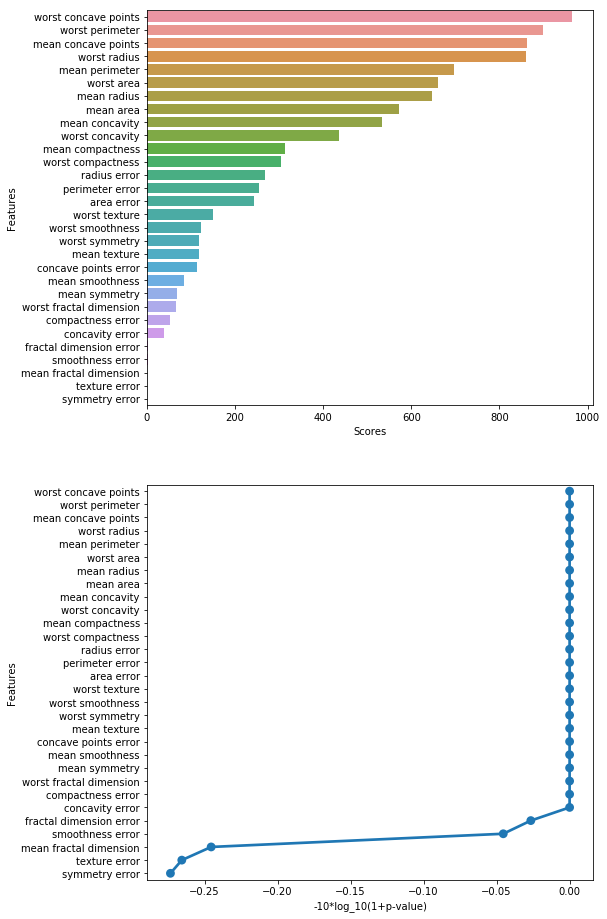

In [96]:
sorted_features_ix = np.argsort(-mi_selector.scores_)
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(8, 16))
sns.barplot(ax = ax1, y = df_features.columns[sorted_features_ix], x = mi_selector.scores_[sorted_features_ix], orient = "h")
ax1.set_xlabel('Scores')
ax1.set_ylabel('Features')

sorted_features_ix = np.argsort(mi_selector.pvalues_)
sns.pointplot(ax = ax2, y = df_features.columns[sorted_features_ix], x = -np.log10(1+mi_selector.pvalues_[sorted_features_ix]), orient = "h")
ax2.set_xlabel('-10*log_10(1+p-value)')
ax2.set_ylabel('Features')

_________________________________
<h2>2. Recursive Feature Elimination </h2>

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the RFE class in the scikit-learn documentation.

The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(df_features, np.ravel(df_target))
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 3
Selected Features: [False False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False  True False False False]
Feature Ranking: [ 2 13 10 27  9 17  1  4  6 23 25 11 28 15 24 22 14 20 18 26  1 12 16 21
  7 19  1  3  5  8]


You can see that RFE chose the the top 3 features as preg, mass and pedi.

These are marked True in the support_ array and marked with a choice “1” in the ranking_ array.

________________________________________
<h2> 3. Feature Importance </h2>

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset. You can learn more about the ExtraTreesClassifier class in the scikit-learn API.

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
# load data
model = ExtraTreesClassifier()
model.fit(df_features, np.ravel(df_target))
print(model.feature_importances_)

[0.10454172 0.02298332 0.00941813 0.03813853 0.00698835 0.02701989
 0.03042937 0.12452068 0.01145074 0.00694849 0.03435993 0.0053962
 0.04070732 0.01659086 0.01005081 0.01016492 0.00656022 0.00549656
 0.00768935 0.00738739 0.09529292 0.02340993 0.03136595 0.10449819
 0.01557075 0.00776018 0.03552605 0.11808986 0.03300415 0.00863925]


Text(0,0.5,'Features')

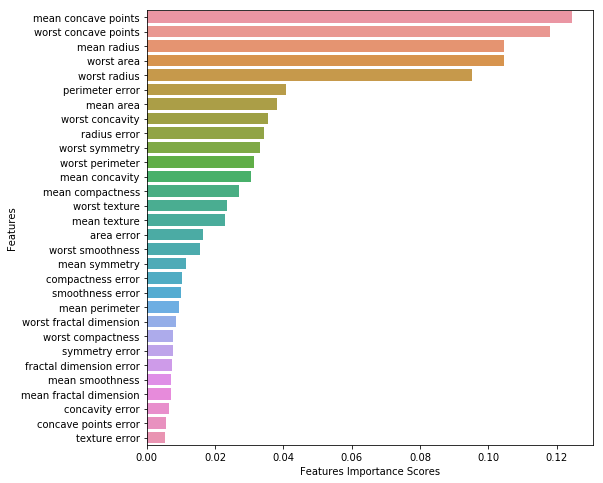

In [105]:
sorted_features_ix = np.argsort(-model.feature_importances_)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8, 8))
sns.barplot(ax = ax, y = df_features.columns[sorted_features_ix], x = model.feature_importances_[sorted_features_ix], orient = "h") 
ax.set_xlabel('Features Importance Scores')
ax.set_ylabel('Features')
